<div style="display: flex; justify-content: center;">
    <img src="../images/Logo-personal_Fondo_blanco.png" alt="Logo_personal" /> 
</div>
<p align="center">
  <h1 align="center">Binomial logistic regression
  Diagnostic breast cancer Wisconsin<h1>
</p>

---

## Introduction
This project aims to generate a multivariable linear regression model to predict life expectancy with social and economic variables from different years and regions of the world. The "Life expectancy & Socio-Economic (world bank)" Dataset was used.

The work is carried out around the analysis, compression, validation, cleaning of the data for its proper use in the training of the model, with the following work path:

- Development
- Understanding the data
- Simple linear regression
  - Adjust null values
  - Create the model
  - Evaluate the model
  - Create predictions
- Multivariable regression
  - Data purification and cleaning
  - Adjust null values
  - Analyze the data
  - Correlation matrix 
  - Convert categorical variables to numeric, with One-hot encoding
  - Model training
  - Evaluating the model
  - Improving the model
  - Dimensionality reduction


## Data
The Data set ["Life expectancy & Socio-Economic (world bank)"](https://www.kaggle.com/datasets/mjshri23/life-expectancy-and-socio-economic-world-bank) of kaggel contains indices of Global life expectancy with Socio-Economic variables 2000-2019

**Attribute Information:**

* ID number
* Diagnosis (M = malignant, B = benign)
* radius (mean of distances from center to points on the perimeter)
* texture (standard deviation of gray-scale values)
* perimeter
* area
* smoothness (local variation in radius lengths)
* compactness (perimeter^2 / area - 1.0)
* concavity (severity of concave portions of the contour)
* concave points (number of concave portions of the contour)
* symmetry
* fractal dimension ("coastline approximation" - 1)

___

## Development
### Importing Libraries

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns
import sklearn.metrics as metrics
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
print('Imported libraries')

Imported libraries


### Import the dataset

In [34]:
df = pd.read_csv("/home/williamccs/cookiecutter-personal/projects_personal_ds/logistic_regression_diagnostic_breast_cancer_wisconsin/data/data.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


There are 32 characteristics including the "diagnosis" label

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [36]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


**Class distribution:**
- B : benign 
- M : Malignant


In [37]:
print("Number of records, percentage of registers:", df["diagnosis"].value_counts(), "\n", "_____________________")
print("Percentage of registers:", df["diagnosis"].value_counts()* 100 /len(df))

Number of records, percentage of registers: diagnosis
B    357
M    212
Name: count, dtype: int64 
 _____________________
Percentage of registers: diagnosis
B    62.741652
M    37.258348
Name: count, dtype: float64


___
## Data cleaning
* The column "Unnamed: 32" does not provide information. 
* The id column is irrelevant for model training

In [39]:
df_clean = df.drop(["id", "Unnamed: 32"], axis=1)
df_clean.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


#### Check null values

In [51]:
df_clean.isna().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

#### Convert the target variable to numeric

In [85]:
df_clean["diagnosis"].replace(to_replace="M", value=1, inplace=True)
df_clean["diagnosis"].replace(to_replace="B", value=0, inplace=True)
df_clean["diagnosis"].value_counts()

diagnosis
0    357
1    212
Name: count, dtype: int64

___
## Correlation analysis

As we have many variables, we do the correlation analysis with the target variable "diagnosis"


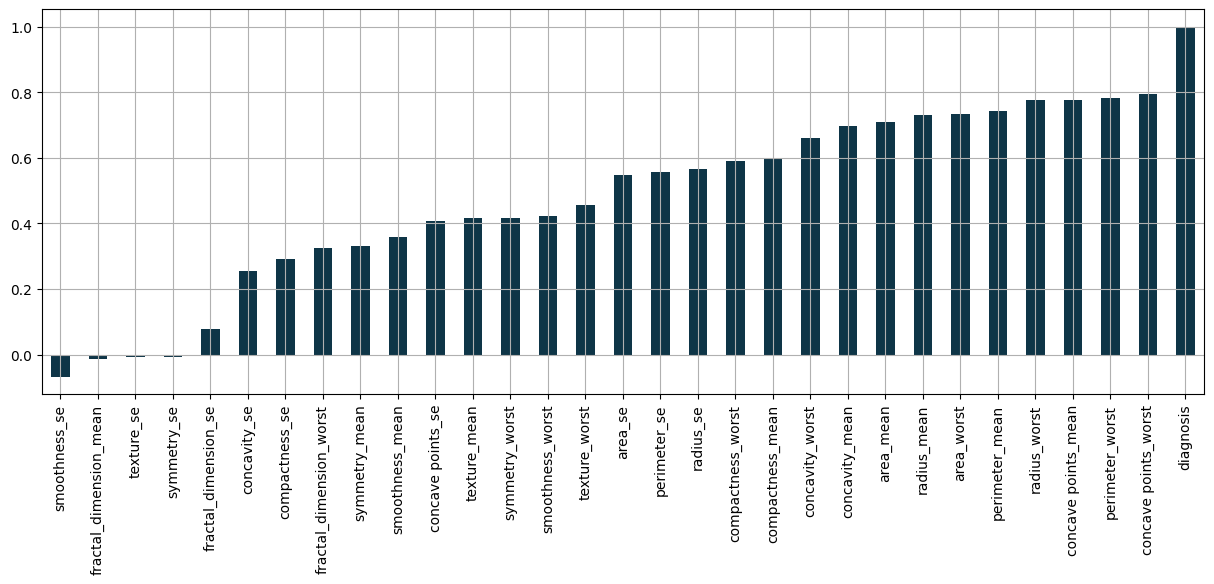

In [56]:
colors = ["#0E3547", "#92EAFF"]

plt.figure(figsize=(15,5))
df_clean.corr()["diagnosis"].sort_values(ascending=True).plot(kind="bar", color=colors[0])
plt.grid()
plt.show()

Most attributes have high positive correlations with the target variable.

___
## Data standardization:

We use the MinMaxScaler method from sklearn

In [49]:
scaler = StandardScaler()
df_processing_scaler = scaler.fit_transform(df_clean)
df_processing_scaler

array([[ 1.29767572,  1.09706398, -2.07333501, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.29767572,  1.82982061, -0.35363241, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.29767572,  1.57988811,  0.45618695, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 1.29767572,  0.70228425,  2.0455738 , ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.29767572,  1.83834103,  2.33645719, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-0.77060855, -1.80840125,  1.22179204, ..., -1.74506282,
        -0.04813821, -0.75120669]])

We convert the tensor into a pandas data frame

In [50]:
df_processing_scaler = pd.DataFrame(df_processing_scaler, columns=df_clean.columns)
df_processing_scaler.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.297676,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.297676,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.297676,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,1.297676,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.297676,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


___
## Exploratory data analysis
A correlation analysis is carried out with a scatter plot and for that we use the pairplot

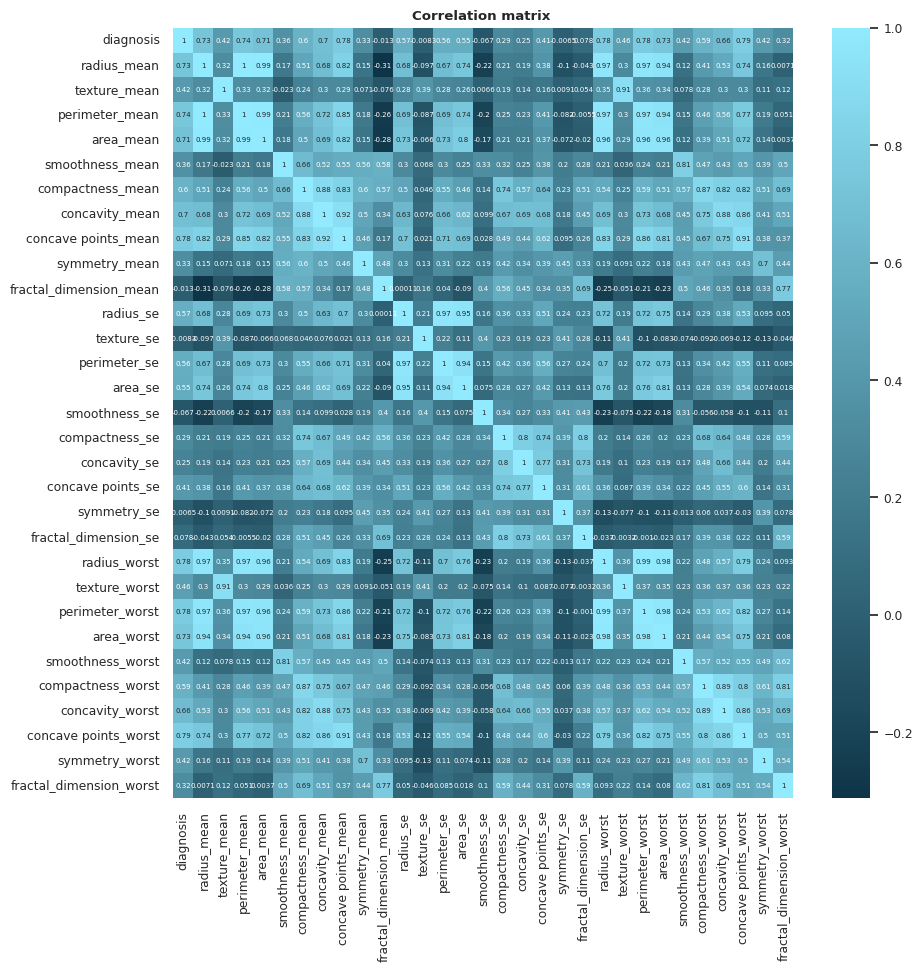

In [80]:
cmap = LinearSegmentedColormap.from_list('Custom', colors, N=256)

plt.figure(figsize=(10,10))
sns.set(style="whitegrid", context="notebook", font_scale=0.8)
sns.heatmap(df_clean.corr(), cmap=cmap, annot=True, annot_kws={"size": 5})
plt.title("Correlation matrix ", fontweight='bold')
plt.show()

There is a high positive correlation between the 4 main variables in their three typologies: "mean", "standard error" and "worst":
- radio
- texture
- perimeter
- area

___
## Model creation
#### We separate the attributes from the label

In [88]:
X = df_processing_scaler.drop(["diagnosis"], axis = 1)
y = df_clean["diagnosis"]
y

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

#### Split training and test data

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify= y, random_state=42)
X_train.shape

# Imprime las proporciones de las clases en ambos conjuntos de datos
print("Proportion of classes in training data", y_train.value_counts() / len(y_train), "\n", "____________________")
print("Proportion of classes in testing data", y_test.value_counts() / len(y_test))

Proportion of classes in training data diagnosis
0    0.626761
1    0.373239
Name: count, dtype: float64 
 ____________________
Proportion of classes in testing data diagnosis
0    0.629371
1    0.370629
Name: count, dtype: float64


#### Create and train the model

In [90]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

#### Evaluate the accuracy of the model with metrics

* We make the predictions with the test variables

* We apply metrics.accuracy_score, with the true labels and predictions

In [91]:
predictions_test = model.predict(X_test)
print(metrics.accuracy_score(y_test, predictions_test))

0.965034965034965


In [92]:
model.score(X_test, y_test)

0.965034965034965